<a href="https://colab.research.google.com/github/sun-gif/data-scientist-projects/blob/master/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#load the data
from google.colab import files
import pandas as pd
uploaded = files.upload()
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']),parse_dates=True)
test= pd.read_csv(io.BytesIO(uploaded['test.csv']),parse_dates=True)
# Dataset is now stored in a Pandas Dataframe

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [2]:
train.head()


,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [3]:
train.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000
mean,13191.000000,26.287693,4.766191,309.712347,11.187074
std,7624.677906,22.935102,79.923297,3457.507200,164.362887
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6596.000000,13.145425,-71.516375,0.000000,0.000000
50%,13191.000000,32.985550,9.775000,0.000000,0.000000
75%,19786.000000,42.501575,64.688975,9.000000,0.000000
max,26381.000000,71.706900,174.886000,67800.000000,6077.000000


Lets take a look at the confirmed cases across the globe. from the bar plot below we can see that COVID-19 is still in the  stage of increasing spreading phase, both confirmed cases and fatalities are increasing. 
Here we will further analysis the Confirmed cases, see if we can Forecast daily COVID-19 spread in regions around world,especially in US

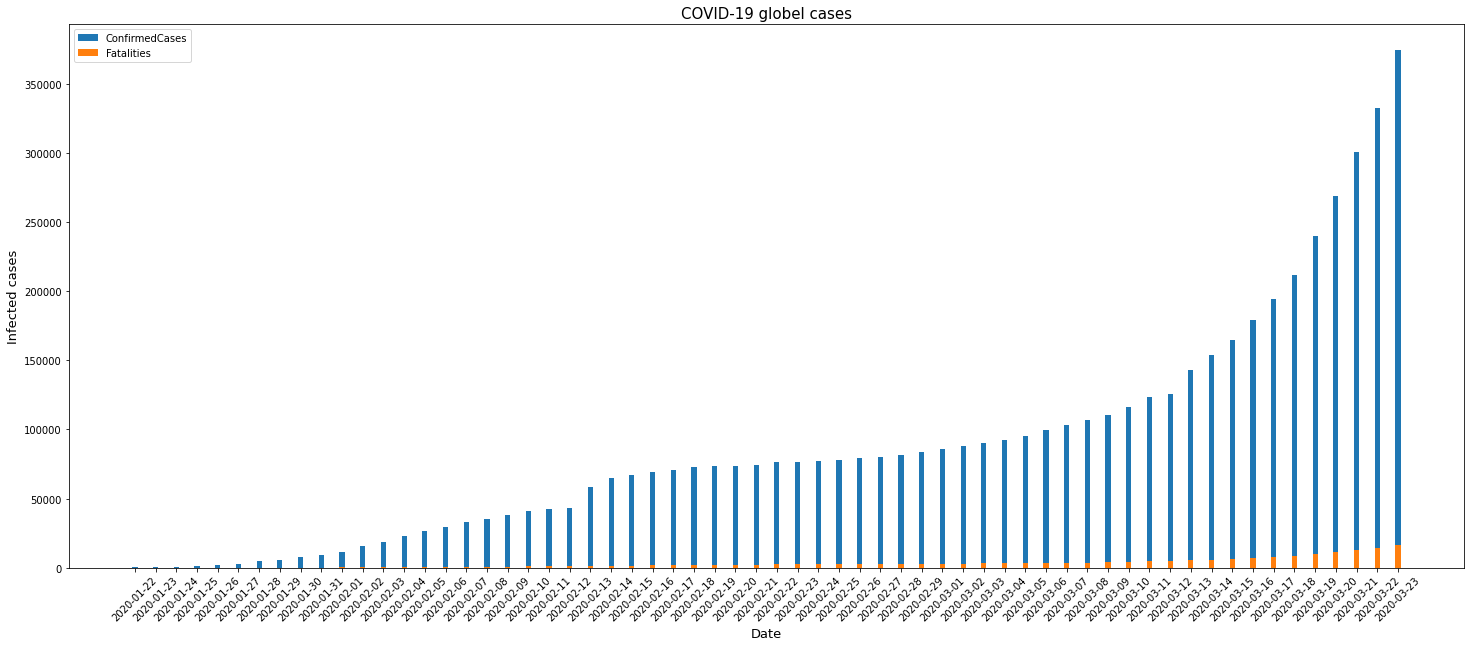

In [20]:
grouped=train.groupby('Date').agg({'ConfirmedCases':sum,'Fatalities':sum}).reset_index()
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import plotly.express as px

plt.figure(figsize=(25,10))

plt.bar(grouped.Date,grouped['ConfirmedCases'],width=0.25,label='Confirmedcases')
plt.bar(grouped.Date,grouped['Fatalities'],width=0.25,label='Fatalities')
plt.legend(['ConfirmedCases','Fatalities'], loc='upper left')
plt.title("COVID-19 globel cases", size=15)
plt.xlabel("Date", size=13)
plt.ylabel("Infected cases", size=13)
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. U

Text(0, 0.5, 'Confirmed infection cases')

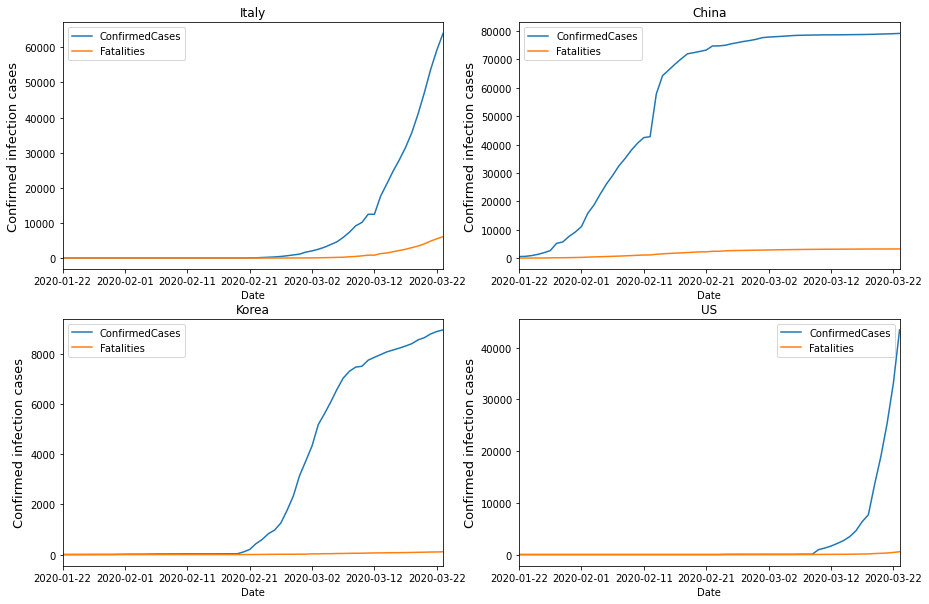

In [23]:
total_date_China = train[train['Country/Region']=='China'].groupby(['Date']).agg({'ConfirmedCases':sum,'Fatalities':sum})

total_date_Singapore = train[train['Country/Region']=='Singapore'].groupby(['Date']).agg({'ConfirmedCases':sum,'Fatalities':sum})

total_date_Italy = train[train['Country/Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':sum,'Fatalities':sum})
total_date_German = train[train['Country/Region']=='Germany'].groupby(['Date']).agg({'ConfirmedCases':sum,'Fatalities':sum})
total_date_US = train[train['Country/Region']=='US'].groupby(['Date']).agg({'ConfirmedCases':sum,'Fatalities':sum})
total_date_Korea = train[train['Country/Region']=='Korea, South'].groupby(['Date']).agg({'ConfirmedCases':sum,'Fatalities':sum})
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)
plt.subplot(2, 2, 2)
total_date_China.plot(ax=plt.gca(), title='China')
plt.ylabel("Confirmed infection cases", size=13)
plt.subplot(2, 2, 3)
total_date_Korea.plot(ax=plt.gca(), title='Korea')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 4)
total_date_US.plot(ax=plt.gca(), title='US')
plt.ylabel("Confirmed infection cases", size=13)

From the above figure, we can see that the spreading in China and Korea already slow down, but US and Italy are still speeding.

In [0]:
pop_italy = 60486683.
pop_german =83042200 
pop_US = 330483530
pop_singapore = 5837230.
pop_Korea= 51269185
pop_China=1439323776

total_date_Italy.ConfirmedCases = total_date_Italy.ConfirmedCases/pop_italy*100.
total_date_Italy.Fatalities = total_date_Italy.ConfirmedCases/pop_italy*100.
total_date_German.ConfirmedCases = total_date_German.ConfirmedCases/pop_german*100.
total_date_German.Fatalities = total_date_German.ConfirmedCases/pop_german*100.
total_date_US.ConfirmedCases = total_date_US.ConfirmedCases/pop_US*100.
total_date_US.Fatalities = total_date_US.ConfirmedCases/pop_US*100.
total_date_Singapore.ConfirmedCases = total_date_Singapore.ConfirmedCases/pop_singapore*100.
total_date_Singapore.Fatalities = total_date_Singapore.ConfirmedCases/pop_singapore*100.
total_date_Korea.ConfirmedCases = total_date_Korea.ConfirmedCases/pop_Korea*100.
total_date_Korea.Fatalities = total_date_Korea.ConfirmedCases/pop_Korea*100
total_date_China.ConfirmedCases = total_date_China.ConfirmedCases/pop_Korea*100.
total_date_China.Fatalities = total_date_China.ConfirmedCases/pop_Korea*100

#plt.figure(figsize=(15,10))
#plt.subplot(2, 2, 1)
#plt.plot(total_date_Italy.Date,total_date_Italy.ConfirmedCases)
#total_date_Italy.ConfirmedCases.plot(ax=plt.gca(),title="Fraction of population infected")


#plt.subplot(2, 2, 2)
#total_date_German.ConfirmedCases.plot(ax=plt.gca())
#plt.ylim(0, 0.06)

#total_date_Korea.ConfirmedCases.plot(ax=plt.gca())
#plt.ylim(0, 0.06)
#plt.subplot(2, 2, 3)
#total_date_US.ConfirmedCases.plot(ax=plt.gca())

#plt.ylim(0, 0.005)
#total_date_China.ConfirmedCases.plot(ax=plt.gca())
#plt.subplot(2, 2, 4)
#total_date_Singapore.ConfirmedCases.plot(ax=plt.gca())
#plt.ylim(0, 0.005)
#plt.ylabel('Confrimedcases')
#plt.legend(["Italy", 'German',"Korea", "US", 'China',"Singapore"], loc='upper left')
#plt.ylim(0, 0.2)

since each country has different population,we may also interest in the fraction of population infected.

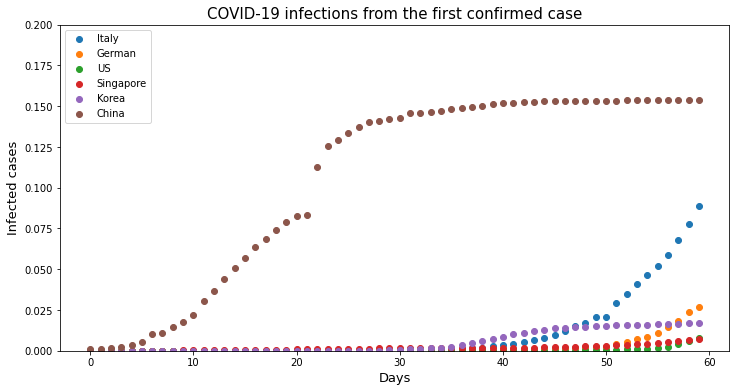

In [26]:


italy = [i for i in total_date_Italy.ConfirmedCases.values]
italy_30 = italy[0:60] 
german = [i for i in total_date_German.ConfirmedCases.values]
german_30 = german[0:60] 
US = [i for i in total_date_US.ConfirmedCases.values]
US_30 = US[0:60] 
singapore = [i for i in total_date_Singapore.ConfirmedCases.values]
singapore_30 = singapore[0:60] 
Korea = [i for i in total_date_Korea.ConfirmedCases.values]
Korea_30 = Korea[0:60] 
China= [i for i in total_date_China.ConfirmedCases.values]
China_30 = China[0:60] 

ind = np.arange(60)
# Plots
plt.figure(figsize=(12,6))
plt.scatter(ind,italy_30)
plt.scatter(ind,german_30)
plt.scatter(ind,US_30)
plt.scatter(ind,singapore_30)
plt.scatter(ind,Korea_30)
plt.scatter(ind,China_30)
plt.legend(["Italy", "German", "US", "Singapore",'Korea','China'], loc='upper left')
plt.title("COVID-19 infections from the first confirmed case", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 0.2)
plt.show()

From above scatter, we can see that Italy, Korea almost start in smilar time,Italy still go up quickly, Korea already went flat. US,German start a little bit late, but increasing quickly. The Korea curve shows it start to go flat in 2-3 weeks. if US take the same action as Korea,we may expect the curve go flat in 2-3 weeks too